In [1]:
import pandas as pd
import numpy as np

# Reading the Data

In [3]:
# read the files
df_boxoffice = pd.read_csv('boxoffice2017_2019.csv')
df_trailer = pd.read_csv('movie_trailer.csv')

In [4]:
df_boxoffice.shape

(2711, 7)

In [5]:
df_boxoffice.head()

,title,domestic_revenue,distributor,budget,MPAA,genres,release_date
0,Avengers: Endgame,"$858,373,000",Walt Disney Studios Motion Pictures,"$356,000,000",PG-13,"Action,Adventure,Drama,Sci-Fi",26-Apr-19
1,Knives Out,"$164,655,243",Lionsgate,"$40,000,000",PG-13,"Comedy,Crime,Drama,Mystery,Thriller",27-Nov-19
2,Star Wars: Episode VIII - The Last Jedi,"$620,181,382",Walt Disney Studios Motion Pictures,"$317,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi",15-Dec-17
3,Aquaman,"$335,061,807",Warner Bros.,NaN,PG-13,"Action,Adventure,Fantasy,Sci-Fi",21-Dec-18
4,Shazam!,"$140,371,656",Warner Bros.,"$100,000,000",PG-13,"Action,Adventure,Comedy,Fantasy",5-Apr-19


In [6]:
df_trailer.head()

,title,trailer,trailer_date,director
0,Brahms: The Boy II,Theatrical Trailer (2020),"February 12, 2020",William Brent Bell
1,The French Dispatch,Trailer (2020),"February 12, 2020",Wes Anderson
2,The Green Knight,Teaser Trailer (2020),"February 13, 2020",David Lowery
3,Antebellum,Teaser Trailer (2020),"November 21, 2019",Gerard Bush
4,The Secret: Dare to Dream,Trailer (2020),"February 13, 2020",Andy Tennant


In [7]:
df_trailer.shape

(25047, 4)

# Combining the Data

In [8]:
# remove 'year' inside the text of title name
df_trailer['title'] = df_trailer['title'].str.replace('(\(2016\))', '')
df_trailer['title'] = df_trailer['title'].str.replace('(\(2017\))', '')
df_trailer['title'] = df_trailer['title'].str.replace('(\(2018\))', '')
df_trailer['title'] = df_trailer['title'].str.replace('(\(2019\))', '')

# remove 'year' inside the text of trailer name
df_trailer['trailer'] = df_trailer['trailer'].str.replace('(\(2016\))', '')
df_trailer['trailer'] = df_trailer['trailer'].str.replace('(\(2017\))', '')
df_trailer['trailer'] = df_trailer['trailer'].str.replace('(\(2018\))', '')
df_trailer['trailer'] = df_trailer['trailer'].str.replace('(\(2019\))', '')

# remove white spaces in trailer and title
df_trailer['title'] = df_trailer['title'].str.strip()
df_trailer['trailer'] = df_trailer['trailer'].str.strip()

## The Issue of the Multiple Entries

### traileraddict (df_trailer)

There are two reasons for the multiple entries. The first reason is that different movies can have the same title. We can use the fact that different movies are produced by different directors. 

In [9]:
# find the movie titles which have the same title but are different movies
## by using the director's name (find the titles with multiple directors)
multiple_directors = []
for name, group in df_trailer.groupby('title'):
    if len(group['director'].unique()) > 1:
        multiple_directors.append(name)
multiple_directors

['A Quiet Place',
 'A Star Is Born',
 'Aladdin',
 'American Violence',
 'Beast',
 'Beauty and the Beast',
 'Blaze',
 'Blood Money',
 'Blood Moon',
 'Borderline',
 'Breathe',
 'Burden',
 'Cargo',
 'Christine',
 'City of Joy',
 'Danger Close',
 'Delirium',
 'Disturbing the Peace',
 'Eden',
 'Escape Room',
 'Extinction',
 'Fallen',
 'Ghostland',
 'King Lear',
 'Legacy',
 'Life',
 'Little Women',
 'Long Shot',
 'Lucky',
 'Man Up',
 'Paradox',
 'Parallel',
 'Passage',
 'Polaroid',
 'Recovery',
 'Reset',
 'Resistance',
 'Rumble',
 'Ryde',
 'Spiral',
 'Split',
 'Tag',
 'The Basement',
 'The Boy',
 'The Chamber',
 'The Darkness',
 'The Guardians',
 'The House That Jack Built',
 'The Jungle Book',
 'The Kindergarten Teacher',
 'The King',
 'The Last Laugh',
 'The Lighthouse',
 'The Lion King',
 'The Little Mermaid',
 'The Lure',
 'The Messenger',
 'The Monster',
 'The Neighbor',
 'The Oath',
 'The Return',
 'The Stranger',
 'The Strongest Man',
 'The Surface',
 'The Tribe',
 'The Veil',
 'The W

The title of the movie is the only column that can identify movies in this analysis. If there are more than one movie under one title, it's not possible to identify movies correctly. Therefore, the movies sharing their title with other movies are excluded in this analysis.

In [10]:
# remove the titles which have multiple directors
for name, group in df_trailer.groupby('title'):
    if len(group['director'].unique()) > 1:
        df_trailer.drop(df_trailer[df_trailer['title']==name].index, inplace=True)

The second reason for the multiple entries in df_trailer is that there are several versions of the movie trailer for each movie. Let's look at the following example for 'Avengers: Endgame' in df_trailer.

In [11]:
# show how many different versions of trailers for a movie - Avengers:Endgame
df_trailer[df_trailer['title']=='Avengers: Endgame']

,title,trailer,trailer_date,director
89,Avengers: Endgame,Blu-Ray Trailer,"June 26, 2019",Anthony Russo
1233,Avengers: Endgame,Trailer,"December 07, 2018",Anthony Russo
1395,Avengers: Endgame,Super Bowl TV Spot,"February 04, 2019",Anthony Russo
1439,Avengers: Endgame,Theatrical Trailer,"March 14, 2019",Anthony Russo
1461,Avengers: Endgame,TV Spot - Honor,"March 21, 2019",Anthony Russo
1463,Avengers: Endgame,Featurette - We Lost,"March 26, 2019",Anthony Russo
1478,Avengers: Endgame,Featurette - IMAX,"March 29, 2019",Anthony Russo
1488,Avengers: Endgame,Special Look Trailer,"April 02, 2019",Anthony Russo
1503,Avengers: Endgame,Featurette - Stakes,"April 07, 2019",Anthony Russo
1522,Avengers: Endgame,End is Near Trailer,"April 15, 2019",Anthony Russo


The trailer named '**Trailer**' is considered the official trailer.Only the observations with the **Trailer** is kept in the data set. If there are multiple **Trailers** for a movie, the earliest released one is selected to calculate the promotion period.

In [12]:
# Select the earliest released trailer with the name "Trailer" 
df_trailer = df_trailer[df_trailer['trailer']=='Trailer']
df_trailer['trailer_date'] = df_trailer['trailer_date'].astype('datetime64')
df_trailer = df_trailer.sort_values('trailer_date', ascending=True).drop_duplicates(subset=['title'], keep='first')

In [13]:
# Check if there are still multiple entries in df_trailer
trailer_multiple = []
for name, group in df_trailer.groupby('title'):
    x,y = group.shape
    if x > 1:
        trailer_multiple.append(name)
print(len(trailer_multiple))

0


### boxofficemojo (df_boxoffice)

See how many titles have multiple entries.

In [14]:
boxoffice_multiple = []
for name, group in df_boxoffice.groupby('title'):
    x,y = group.shape
    if x > 1:
        boxoffice_multiple.append(name)
print(len(boxoffice_multiple))

223


There are several reasons for the multiple entries under the same title in this data set. First, two different movies have the same title. Second, the same movie was re-released on different dates under the same distributors or the different distributors. Third, the same movie was recorded multiple times in the boxofficemojo because the movie played in two different years.

Considering the first two reasons, check how many titles have multiple distributors under the same title and how many titles have multiple release dates.

In [15]:
# check how many titles have multiple distributors
multiple_app1 = []
for name, group in df_boxoffice.groupby('title'):
    x,y = group.shape
    if (x>1) & (len(group['distributor'].unique()) > 1):
        multiple_app1.append(name)
print(len(multiple_app1))

21


In [16]:
# check how many titles have multiple release dates
multiple_app2 = []
for name, group in df_boxoffice.groupby('title'):
    x,y = group.shape
    if (x>1) & (len(group['release_date'].unique()) > 1):
        multiple_app2.append(name)
print(len(multiple_app2))

35


The titles with multiple distributors or release dates should not be used in this analysis because using those entries can cause mismatches in merging two data sets and also increases the inaccuracy of the analysis.

In [17]:
# remove the titles with multiple entries
for name, group in df_boxoffice.groupby('title'):
    x,y = group.shape
    if (x>1) & (len(group['distributor'].unique()) > 1):
        df_boxoffice.drop(df_boxoffice[df_boxoffice['title']==name].index, inplace=True)
        
for name, group in df_boxoffice.groupby('title'):
    x,y = group.shape
    if (x>1) & (len(group['release_date'].unique()) > 1):
        df_boxoffice.drop(df_boxoffice[df_boxoffice['title']==name].index, inplace=True)

The last case is that the same movies are recorded multiple times because some movies release periods overlapped into the next year. For example, if a movie played from Nov 2017 to March 2018, this movie is listed in the page for 2018 as well as the page for 2017. Since I scraped the information about the movies listed in each year, the movies playing in two different years were scraped twice. In this case we can keep just one of the entries.

In [18]:
# remove duplicates and keep one entry
df_boxoffice = df_boxoffice.drop_duplicates(subset=['title'])
df_boxoffice.reset_index(drop=True, inplace=True)

## Combining data sets

In [19]:
df = pd.merge(df_boxoffice, df_trailer, how='inner', on = 'title')

In [20]:
df.shape

(1118, 10)

### Another Issue for Combining Data Sets

The total number of movies matched is 1118. There is one issue regarding merging these data sets. Since there is no identification number for each movie, titles of the movies are used for combining data sets. However, one significant problem is that some movies have different titles between the two data sets. Look at the example for '**Incredibles 2**'.

In [21]:
df_trailer[df_trailer['title'].str.contains('Incredibles')]

,title,trailer,trailer_date,director
3431,The Incredibles 2,Trailer,2018-02-15,Brad Bird


In [22]:
df_boxoffice[df_boxoffice['title'].str.contains('Incredibles')]

,title,domestic_revenue,distributor,budget,MPAA,genres,release_date
2152,Incredibles 2,"$608,581,744",Walt Disney Studios Motion Pictures,NaN,PG,"Action,Adventure,Animation,Comedy,Family,Sci-Fi",15-Jun-18


This movie is listed as '**The** Incredibles 2' in trailderaddict.com and 'Incredibles 2' in boxofficemojo.com.In this case, this movie cannot be matched using a regular method. One possible solution for this issue is to use the **fuzz** function in the **fuzzywuzzy** library. 

In [23]:
from fuzzywuzzy import fuzz

c:\users\hannah\appdata\local\programs\python\python37-32\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [24]:
# the case when the two names are exactly identical
name1 = 'Incredibles 2'
name2 = 'Incredibles 2'
fuzz.ratio(name1, name2)

100

In [25]:
# the case for Incredible 2
name1 = 'Incredibles 2'
name2 = 'The Incredibles 2'
fuzz.ratio(name1, name2)

87

one big problem for using this method is that there are many different movies with very similar titles in the movie industry. For example, consider these two movies.

In [26]:
# the movies 'Cold Water' and 'Cold War'
name1 = 'Cold Water'
name2 = 'Cold War'
fuzz.ratio(name1, name2)

89

The distance score between these two different movies is even higher than the case for 'Incredibles 2' and 'The Incredibles 2'. The Fuzz function is a good tool to use for matching entries with different strings. But in this analysis there can be a trade-off between gaining more data and decreasing accuracy. 

In practice, I matched about 80 more entries with the score over 85. However, considering the possibility that this number includes wrong matches, the negative effect of falling accuracy seems to be greater than the positive effect of gaining more data. 

For this reason, I decided to Not use this new method and just match the movies using the regular merging method.

# Missing Values and Converting Formats

## Missing Values

In [27]:
missing = df.isnull().sum().to_frame()
missing.rename(columns={0:'missing_values'}, inplace=True)
missing

,missing_values
title,0
domestic_revenue,0
distributor,0
budget,857
MPAA,369
genres,0
release_date,77
trailer,0
trailer_date,0
director,0


**budget, MPAA, release_date** have missing values.

**budget and MPAA**: There are so many missing values in budget and MPAA. Because the majority of the observation are missing values for these features, I will not replace missing values for any other values.


**release_date** is one of our main interest features. Therefore, we will drop rows with missing values in **release_date** because it's not possible to calculate the promotion period without **release_date**

In [28]:
df.dropna(subset=['release_date'], axis=0, inplace=True)

In [29]:
df.shape

(1041, 10)

## Converting Format

In [30]:
df.dtypes

title                       object
domestic_revenue            object
distributor                 object
budget                      object
MPAA                        object
genres                      object
release_date                object
trailer                     object
trailer_date        datetime64[ns]
director                    object
dtype: object

#### budget

In [31]:
df['budget'] = df['budget'].str.replace(',','')
df['budget'] = df['budget'].str.replace('$','')
df['budget'] = df['budget'].astype(float)

# Promotion Period

In [32]:
# create the feature for Promotion Period. Name it 'promotion_days'
df['release_date'] = df['release_date'].astype('datetime64')
df['promotion_days'] = df['release_date']-df['trailer_date']
df['promotion_days'] = df['promotion_days'].dt.days.astype(int)

In [33]:
df['promotion_days'].describe()

count    1041.000000
mean      108.304515
std       138.840752
min      -411.000000
25%        37.000000
50%        77.000000
75%       140.000000
max      1359.000000
Name: promotion_days, dtype: float64

The min value of the promotion_days is -411 days and the max value is 1359 days. 

The cases for negative values in the promotion period are due to the movies being re-released or produced in foreign countries and released in the US later. The negative promotion period is not realistic at all. Therefore, these entries with negative values in promotion_days will be dropped from the data set.

When it comes to entries with a much larger value in promotion_days, there are a couple reasons for these cases. In some of these cases, there are movies that were re-released or there were different movies that matched due to having the same titles even though the titles do not have multiple entries. Or some movies might release their first trailers more than a year before the movies are released for some reasons. 

No matter what the reasons for the huge values are, these cases can be considered outliers. Therefore, I will drop the entries with more than 365 days ofpromotion_days as well.

In [34]:
# remove outliers
df = df[(df['promotion_days'] > 0) & (df['promotion_days'] < 365)]

In [35]:
df.shape

(947, 11)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Promotion Period 
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.distplot(df['promotion_days'],hist=True, kde=False, bins=30, color ='blue', hist_kws={'edgecolor':'black'})

plt.xlabel('Promotion Period(Days)',size=15)
plt.ylabel('Number of Movies', size=15)

Text(0, 0.5, 'Number of Movies')

### Cleaning Unnecessary Features

In [37]:
df.drop(['domestic_revenue', 'trailer', 'director'], axis=1, inplace=True)

In [38]:
df.columns

Index(['title', 'distributor', 'budget', 'MPAA', 'genres', 'release_date',
       'trailer_date', 'promotion_days'],
      dtype='object')

In [39]:
df.shape

(947, 8)

# Factors Affecting Promotion Period

## Budget

In [40]:
#combining sony pictures releaseing and classics
for i in df.index:
    if (df.loc[i,'distributor'] == 'Sony Pictures Releasing')|(df.loc[i,'distributor'] == 'Sony Pictures Classics'):
        df.loc[i,'distributor'] = 'Sony Pictures'

In [41]:
# Select entries with non-missing values in budget
df_budget = df[df['budget'].notnull()]
df_budget.shape

(241, 8)

In [42]:
# Classify the data into eight groups: 
## Walt Diseney, Warner Bros, Sony Pictures, Universal Pictures, 21th Century Fox, 
## Paramount Pictures, Liongate, and the rest of the distributors
df_budget['distributor2'] = None

for i in df_budget.index:
    if (df_budget.loc[i,'distributor'] == 'Walt Disney Studios Motion Pictures')|(df_budget.loc[i,'distributor'] == 'Warner Bros.')|(df_budget.loc[i,'distributor'] == 'Sony Pictures')|(df_budget.loc[i,'distributor'] == 'Universal Pictures')|(df_budget.loc[i,'distributor'] == 'Twentieth Century Fox')|(df_budget.loc[i,'distributor'] == 'Paramount Pictures')|(df_budget.loc[i,'distributor'] == 'Lionsgate'):
        df_budget.loc[i,'distributor2'] = df_budget.loc[i,'distributor']
    else:
        df_budget.loc[i,'distributor2'] = 'else'

c:\users\hannah\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\users\hannah\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


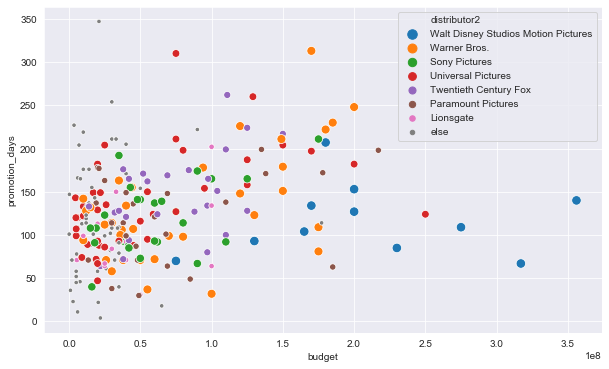

In [43]:
# Scatter Plots
dist_order=['Walt Disney Studios Motion Pictures','Warner Bros.','Sony Pictures'
           ,'Universal Pictures','Twentieth Century Fox','Paramount Pictures',
           'Lionsgate','else']
width = 10
height = 6
plt.figure(figsize=(width, height))

sns.scatterplot('budget', 'promotion_days', hue='distributor2', hue_order=dist_order, size='distributor2', size_order=dist_order, sizes=(20,90), data=df_budget)
plt.legend(loc='upper right', ncol=1)

The positive correlation is seen slightly in the plot. 

The correlation coefficient is as follows:

In [44]:
# Correlation Coefficient
from scipy import stats

coef,p_val = stats.pearsonr(df_budget['budget'], df_budget['promotion_days'])
print('Correlation Coefficient:', coef, 'p-value:', p_val)

Correlation Coefficient: 0.29353316461567114 p-value: 3.5574707639001662e-06


Let's draw the scatter plots and calculate the correlation coefficients for each distributor.

In [45]:
major_dist=['Walt Disney Studios Motion Pictures','Warner Bros.','Sony Pictures','Universal Pictures','Twentieth Century Fox','Paramount Pictures','Lionsgate']

df_walt = df_budget[df_budget['distributor']=='Walt Disney Studios Motion Pictures']
df_warner = df_budget[df_budget['distributor']=='Warner Bros.']
df_sony = df_budget[df_budget['distributor']=='Sony Pictures']
df_universal = df_budget[df_budget['distributor']=='Universal Pictures']
df_20th = df_budget[df_budget['distributor']=='Twentieth Century Fox']
df_para = df_budget[df_budget['distributor']=='Paramount Pictures']
df_lion = df_budget[df_budget['distributor']=='Lionsgate']
df_else = df_budget[~df_budget['distributor'].isin(major_dist)]

Text(1028.5163043478262, 0.5, '')

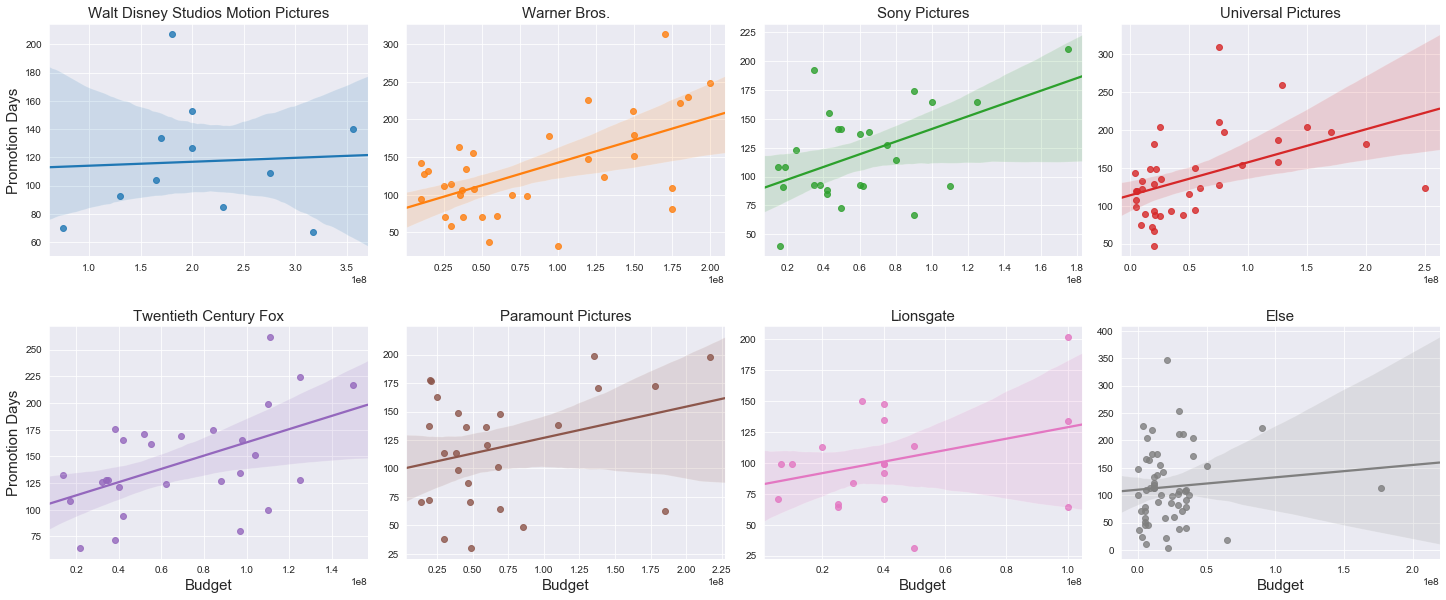

In [46]:
f,axs=plt.subplots(2,4, figsize=(20,8))
f.tight_layout()
f.subplots_adjust(hspace=.3)

sns.regplot('budget', 'promotion_days', data=df_walt, ax=axs[0,0])
axs[0,0].set_title('Walt Disney Studios Motion Pictures',fontsize=15)
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Promotion Days',fontsize=15)

sns.regplot('budget', 'promotion_days', data=df_warner, ax=axs[0,1])
axs[0,1].set_title('Warner Bros.',fontsize=15)
axs[0,1].set_xlabel('')
axs[0,1].set_ylabel('')

sns.regplot('budget', 'promotion_days', data=df_sony, ax=axs[0,2])
axs[0,2].set_title('Sony Pictures',fontsize=15)
axs[0,2].set_xlabel('')
axs[0,2].set_ylabel('')

sns.regplot('budget', 'promotion_days', data=df_universal, ax=axs[0,3])
axs[0,3].set_title('Universal Pictures',fontsize=15)
axs[0,3].set_xlabel('')
axs[0,3].set_ylabel('')

sns.regplot('budget', 'promotion_days', data=df_20th, ax=axs[1,0])
axs[1,0].set_title('Twentieth Century Fox',fontsize=15)
axs[1,0].set_xlabel('Budget',fontsize=15)
axs[1,0].set_ylabel('Promotion Days',fontsize=15)

sns.regplot('budget', 'promotion_days', data=df_para, ax=axs[1,1])
axs[1,1].set_title('Paramount Pictures',fontsize=15)
axs[1,1].set_xlabel('Budget',fontsize=15)
axs[1,1].set_ylabel('')

sns.regplot('budget', 'promotion_days', data=df_lion, ax=axs[1,2])
axs[1,2].set_title('Lionsgate',fontsize=15)
axs[1,2].set_xlabel('Budget',fontsize=15)
axs[1,2].set_ylabel('')

sns.regplot('budget', 'promotion_days', data=df_else, ax=axs[1,3])
axs[1,3].set_title('Else',fontsize=15)
axs[1,3].set_xlabel('Budget',fontsize=15)
axs[1,3].set_ylabel('')

In [47]:
dist_dict = {'Walt Disney':df_walt, 'Warner Bros.':df_warner,'Sony Pictures':df_sony,
             'Universal Pictures':df_universal, 'Twentieth Century Fox':df_20th,'Paramount Pictures':df_para,
             'Lionsgate':df_lion,'Else':df_else}

df_corr = pd.DataFrame(columns=['Distributor','Corr Coef','P-value'])
i = 0
for key,value in dist_dict.items():
    coef, p_val = stats.pearsonr(value['budget'],value['promotion_days'])
    df_corr.loc[i,'Distributor'] = key
    df_corr.loc[i,'Corr Coef'] = coef
    df_corr.loc[i,'P-value'] = p_val
    i += 1
df_corr

,Distributor,Corr Coef,P-value
0,Walt Disney,0.0554667,0.871324
1,Warner Bros.,0.582318,0.000302591
2,Sony Pictures,0.507619,0.00811652
3,Universal Pictures,0.472027,0.00241481
4,Twentieth Century Fox,0.509443,0.00664368
5,Paramount Pictures,0.307583,0.118587
6,Lionsgate,0.339473,0.155053
7,Else,0.0874983,0.513682


## Distributors

In [48]:
df['distributor'].value_counts().head(15)

Sony Pictures                          62
IFC Films                              58
Warner Bros.                           53
Magnolia Pictures                      44
Universal Pictures                     43
Lionsgate                              38
Well Go USA Entertainment              32
Twentieth Century Fox                  32
Paramount Pictures                     31
Walt Disney Studios Motion Pictures    23
A24                                    22
The Orchard                            21
Strand Releasing                       18
STX Entertainment                      18
Roadside Attractions                   18
Name: distributor, dtype: int64

4 major distributors and 4 minor distributors are selected. 

'Walt Disney Studio', 'Warner Bros.', 'Sony Pictures', and 'Universal Pictures' are the movie distributors with market share greater than 10% respectively. 

The market share of 'Well Go USA Entertainment', 'The Orchard', and 'Strand Releasing' is below 0.1% respectively. 'IFC Films' is the company which distributes mainly independent films and its market share is around 0.2%.

In [49]:
df_dist = df[(df['distributor']=='Walt Disney Studios Motion Pictures')|(df['distributor']=='Warner Bros.')|(df['distributor']=='Sony Pictures')|(df['distributor']=='Universal Pictures')|(df['distributor']=='The Orchard')|(df['distributor']=='IFC Films')|(df['distributor']=='Well Go USA Entertainment')|(df['distributor']=='Strand Releasing')]

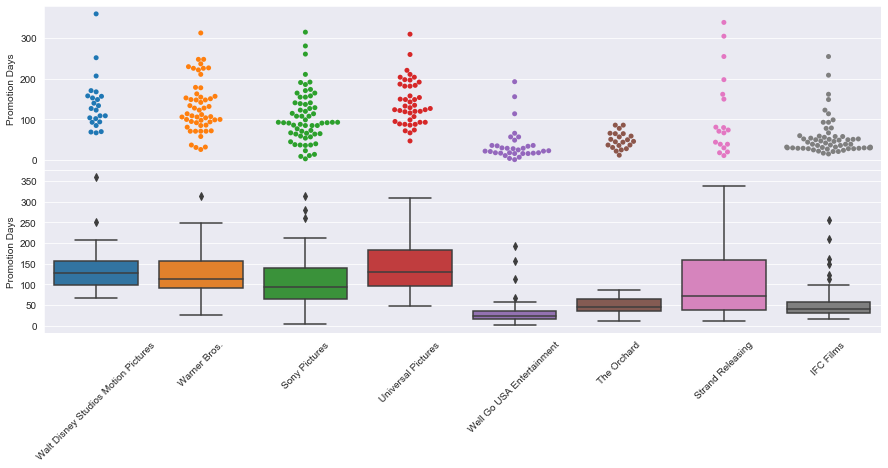

In [50]:
dist_order=['Walt Disney Studios Motion Pictures','Warner Bros.','Sony Pictures'
           ,'Universal Pictures','Well Go USA Entertainment',
           'The Orchard','Strand Releasing','IFC Films']

f,ax=plt.subplots(2,1,figsize=(15,6))
f.subplots_adjust(hspace=0)
sns.catplot('distributor', 'promotion_days', kind='swarm', order=dist_order, data=df_dist, ax=ax[0])
ax[0].set_xticklabels([])
ax[0].set_xlabel('')
ax[0].set_ylabel('Promotion Days')
sns.catplot('distributor', 'promotion_days', kind="box", order=dist_order, data=df, ax=ax[1])
ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation=45, fontsize='medium')
ax[1].set_xlabel('')
ax[1].set_ylabel('Promotion Days')

plt.close(2)
plt.close(3)

The promotion period for the major distributors is likely to be greater than those for the minor distributors. 

This is because major distributors generally distribute movies with large budgets or movies that are highly anticipated by people even before the production. In order to attract more attention or interest, they are likely to have longer promotion periods for their movies.

## MPAA

In [51]:
# Select the entries with non-missing values in MPAA
df_MPAA = df[df['MPAA'].notnull()]

In [52]:
# show the counts for each rating
mpaa_counts = df_MPAA['MPAA'].value_counts().to_frame()
mpaa_counts.rename(columns={'MPAA':'Counts'}, inplace=True)
mpaa_counts.index.name='MPAA'
mpaa_counts

,Counts
MPAA,
R,323
PG-13,214
PG,92
Not Rated,7
G,5


Since the rating 'G' and 'Not Rated' have very small numbers, they are excluded in the analysis.

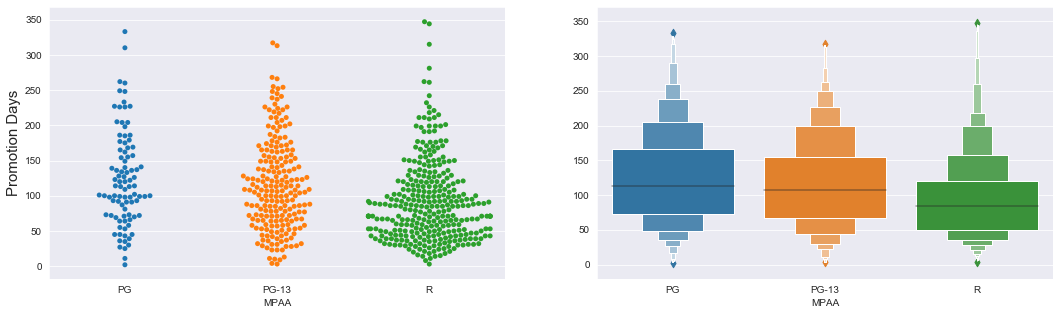

In [53]:
# Show how the distributions of the promotion_days for each rating group are different.
f, ax = plt.subplots(1,2,figsize=(18,5))

sns.catplot('MPAA', 'promotion_days', order=['PG', 'PG-13', 'R'], kind="swarm", data=df_MPAA, ax=ax[0])
ax[0].set_ylabel('Promotion Days', fontsize=15)
sns.catplot('MPAA', 'promotion_days', order=['PG', 'PG-13', 'R'], kind="boxen", data=df_MPAA, ax=ax[1])
ax[1].set_ylabel('')

plt.close(2)
plt.close(3)

The graphs above show that the distributions between 'PG' and 'PG-13' movies seem to not have any significant difference. However, comparing them with 'R' rated movies show that the distribution of 'R' rated movies seems to be slightly lower. 

To see if the difference is statistically significant, let's do the t-test and Kolmogorov-Smirnov(KS) test.

#### PG and PG-13

In [54]:
t_stat0,p_val0 = stats.ttest_ind(df_MPAA[df_MPAA['MPAA']=='PG']['promotion_days'],df_MPAA[df_MPAA['MPAA']=='PG-13']['promotion_days'])
ks_stat0, p_val1=stats.ks_2samp(df_MPAA[df_MPAA['MPAA']=='PG']['promotion_days'],df_MPAA[df_MPAA['MPAA']=='PG-13']['promotion_days'])
print("t-statistic:", t_stat0, 'p-value:', p_val0)
print("KS-statistic:", ks_stat0, 'p-value:', p_val1)

t-statistic: 1.0793963102461517 p-value: 0.2812667397489795
KS-statistic: 0.10371800081267778 p-value: 0.45484841118492003


The t-statistic between PG and PG-13 movies to test the difference of means between two samples is not statistically significant even at 10% level. This means that we cannot reject the null hypothesis that the means of the two distributions are equal. 

KS-test is to measure the maximum distance between the two cumulative distributions to see if the two distributions are different. As KS-statistic is bigger, the difference between the two distributions gets larger. In the case above, the p-value for KS-statistics is 0.4548, which means that the difference is not significant at the 10% level.

#### PG-13 and R

In [55]:
t_stat1,p_val2 =stats.ttest_ind(df_MPAA[df_MPAA['MPAA']=='PG-13']['promotion_days'], df_MPAA[df_MPAA['MPAA']=='R']['promotion_days'])
ks_stat1, p_val3=stats.ks_2samp(df_MPAA[df_MPAA['MPAA']=='PG-13']['promotion_days'], df_MPAA[df_MPAA['MPAA']=='R']['promotion_days'])
print("t-statistic:", t_stat1, 'p-value:', p_val2)
print("KS-statistic:", ks_stat1, 'p-value:', p_val3)

t-statistic: 4.436509787136331 p-value: 1.1105313176936263e-05
KS-statistic: 0.21399843754520992 p-value: 1.1780840307507034e-05


Both of t-statistic and KS-statistic are significant even at the 1% level, which means that the distribution of 'R' movies is statistically lower than the distribution of 'PG-13'.

## Genres

In [56]:
# number of unique values in genres
len(df['genres'].unique())

324

The genre for each movie is expressed as the combination of several base genres. The number of the unique values in genres is 324. 

Instead of using this raw values in genre, I created dummy features for each base genre. Here's the number of frequency for each base genre in our data set.

In [57]:
counts = dict()

for i in df.index:
    for bgenre in df.loc[i, 'genres'].split(','):
        if bgenre not in counts:
            counts[bgenre] = 1
        else:
            counts[bgenre] = counts[bgenre] + 1

{'Action': 185, 'Adventure': 148, 'Drama': 539, 'Sci-Fi': 93, 'Comedy': 250, 'Crime': 129, 'Mystery': 113, 'Thriller': 237, 'Fantasy': 108, 'Family': 82, 'Animation': 54, 'Horror': 107, 'Biography': 113, 'Romance': 138, 'Documentary': 127, 'War': 49, 'History': 60, 'Music': 42, 'Sport': 21, 'Western': 15, 'Musical': 18}


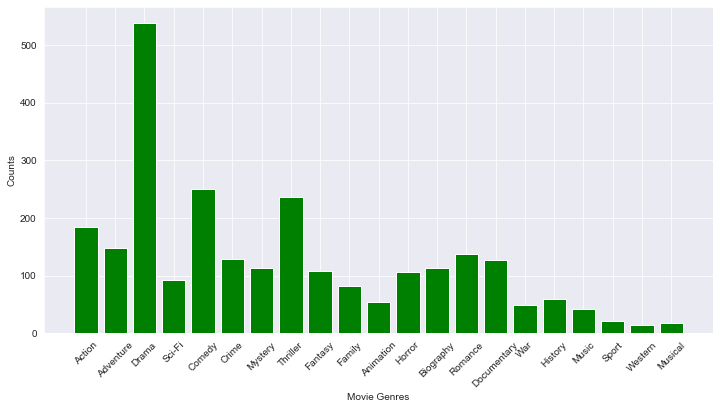

In [58]:
plt.figure(figsize=(12,6))
plt.bar(list(counts.keys()), counts.values(), color='g')
plt.xticks(rotation=45)
plt.xlabel('Movie Genres')
plt.ylabel('Counts')
print(counts)

Let's create dummy features for those base genres. For each movie, if the genre includes 'Action' in its value, the movie has the value of 1 for Action dummy feature, and 0 if not. This is applies to the other genres as well. 

In [59]:
# Creating columns for each genre
for genre in counts.keys():
    df[genre] = None
    for i in df.index:
        if genre in df.loc[i, 'genres']:
            df.loc[i, genre] = 1
        else:
            df.loc[i, genre] = 0

In [60]:
df.columns

Index(['title', 'distributor', 'budget', 'MPAA', 'genres', 'release_date',
       'trailer_date', 'promotion_days', 'Action', 'Adventure', 'Drama',
       'Sci-Fi', 'Comedy', 'Crime', 'Mystery', 'Thriller', 'Fantasy', 'Family',
       'Animation', 'Horror', 'Biography', 'Romance', 'Documentary', 'War',
       'History', 'Music', 'Sport', 'Western', 'Musical'],
      dtype='object')

In [61]:
# Show t-statistics and KS-statistics for each genre
df_genres = pd.DataFrame(columns=['t-statistic','p-value(t)','KS-statistic','p-value(KS)'],index=df.columns[10:])
for genre in df.columns[10:]:
    t_stat,p_val0 = stats.ttest_ind(df[df[genre]==1]['promotion_days'],df[df[genre]==0]['promotion_days'])
    ks_stat, p_val1 = stats.ks_2samp(df[df[genre]==1]['promotion_days'],df[df[genre]==0]['promotion_days'])
    df_genres.loc[genre,'t-statistic'] = t_stat
    df_genres.loc[genre,'p-value(t)'] = p_val0
    df_genres.loc[genre,'KS-statistic'] = ks_stat
    df_genres.loc[genre,'p-value(KS)'] = p_val1    
    
df_genres

,t-statistic,p-value(t),KS-statistic,p-value(KS)
Drama,-2.24278,0.025142,0.103141,0.0130238
Sci-Fi,4.89513,1.15485e-06,0.317721,5.11747e-08
Comedy,-1.06864,0.285504,0.059122,0.517352
Crime,0.997226,0.31891,0.112545,0.109101
Mystery,-0.11623,0.907495,0.0856094,0.432608
Thriller,1.84407,0.0654853,0.139906,0.00171059
Fantasy,5.28914,1.52743e-07,0.288372,1.56575e-07
Family,4.88035,1.24252e-06,0.310264,6.76677e-07
Animation,3.78109,0.000165944,0.292128,0.000241496
Horror,0.546434,0.584897,0.126413,0.0874802


The t-statistics and KS-statistics for some genres are significant. 

Especially, the distributions of the promotion period for the movies with Action, Adventure, Sci-Fi, Fantasy, Family, or Animation are relatively long compared to other genres.